In [35]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the paths to the images
left_image_path = r'C:\Users\Yashraj Deshmukh\Desktop\Panaroma-Stitching\Images\I3\3_3.jpg'
right_image_path = r'C:\Users\Yashraj Deshmukh\Desktop\Panaroma-Stitching\Images\I3\3_4.jpg'

# Load the images
left_image = cv2.imread(left_image_path)
right_image = cv2.imread(right_image_path)

## Identifying Correspondence

### Feature Extraction - SIFT

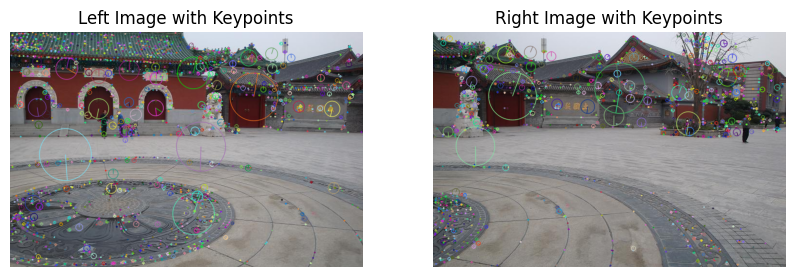

In [4]:
# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect SIFT features and compute descriptors
keypoints_left, descriptors_left = sift.detectAndCompute(left_image, None)
keypoints_right, descriptors_right = sift.detectAndCompute(right_image, None)

# Draw keypoints on the images
left_image_with_keypoints = cv2.drawKeypoints(left_image, keypoints_left, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
right_image_with_keypoints = cv2.drawKeypoints(right_image, keypoints_right, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the images with keypoints using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Left Image with Keypoints')
plt.imshow(cv2.cvtColor(left_image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Right Image with Keypoints')
plt.imshow(cv2.cvtColor(right_image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

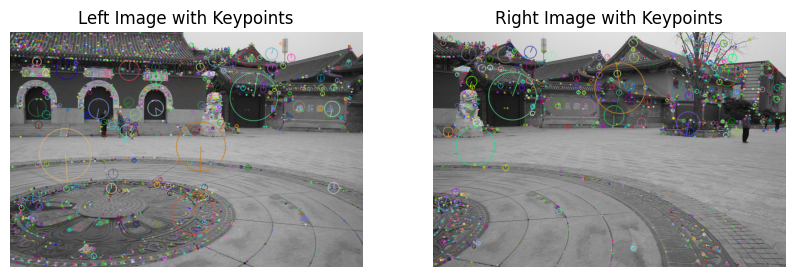

In [5]:
# Convert the images to grayscale
left_image_gray = cv2.cvtColor(left_image, cv2.COLOR_BGR2GRAY)
right_image_gray = cv2.cvtColor(right_image, cv2.COLOR_BGR2GRAY)

# Initialize SIFT detector
sift_gray = cv2.SIFT_create()

# Detect SIFT features and compute descriptors
keypoints_left_gray, descriptors_left_gray = sift_gray.detectAndCompute(left_image_gray, None)
keypoints_right_gray, descriptors_right_gray = sift_gray.detectAndCompute(right_image_gray, None)

# Draw keypoints on the images
left_image_with_keypoints_gray = cv2.drawKeypoints(left_image_gray, keypoints_left_gray, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
right_image_with_keypoints_gray = cv2.drawKeypoints(right_image_gray, keypoints_right_gray, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the images with keypoints using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Left Image with Keypoints')
plt.imshow(cv2.cvtColor(left_image_with_keypoints_gray, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Right Image with Keypoints')
plt.imshow(cv2.cvtColor(right_image_with_keypoints_gray, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

In [8]:
type(keypoints_left_gray), type(keypoints_left_gray[0]), type(keypoints_left_gray[0].pt), type(keypoints_left_gray[0].pt[0])

(tuple, cv2.KeyPoint, tuple, float)

In [13]:
print(keypoints_left_gray[0]), print(keypoints_left_gray[0].pt)

< cv2.KeyPoint 000002867FE8BCC0>
(2.45477032661438, 392.1797790527344)


(None, None)

In [20]:
keypoints_left[0], keypoints_left[0].pt

(< cv2.KeyPoint 000002860FBD3DB0>, (2.45477032661438, 392.1797790527344))

In [11]:
type(descriptors_left_gray), descriptors_left_gray.shape

(numpy.ndarray, (2061, 128))

In [12]:
print(len(keypoints_left_gray), descriptors_left_gray.shape)
print(len(keypoints_left), descriptors_left.shape)
print(len(keypoints_right_gray), descriptors_right_gray.shape)
print(len(keypoints_right), descriptors_right.shape)

2061 (2061, 128)
2061 (2061, 128)
1289 (1289, 128)
1289 (1289, 128)


### Feature Matching - BF

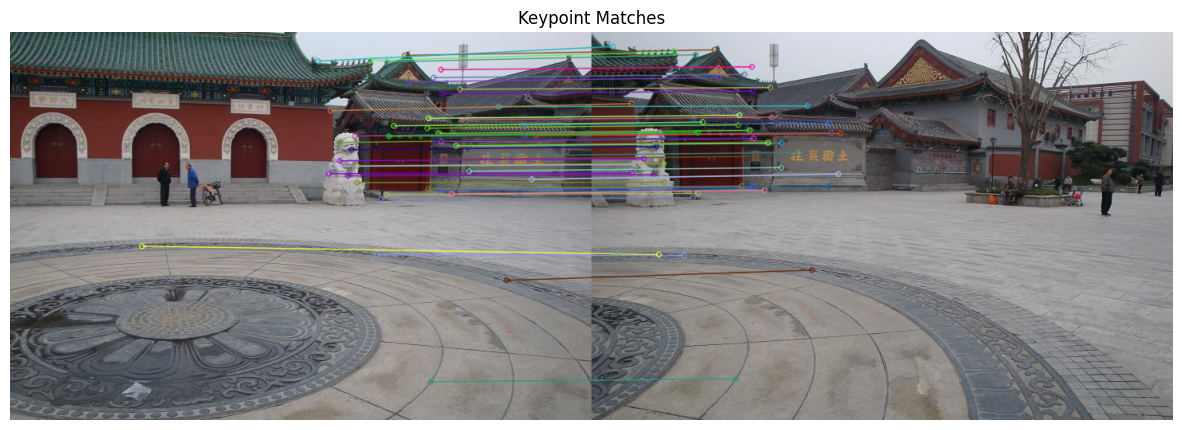

In [21]:
# Initialize the BFMatcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Match descriptors
matches = bf.match(descriptors_left, descriptors_right)

# Sort matches based on distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw the matches
matched_image = cv2.drawMatches(left_image, keypoints_left, right_image, keypoints_right, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matched images using matplotlib
plt.figure(figsize=(15, 10))
plt.title('Keypoint Matches')
plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

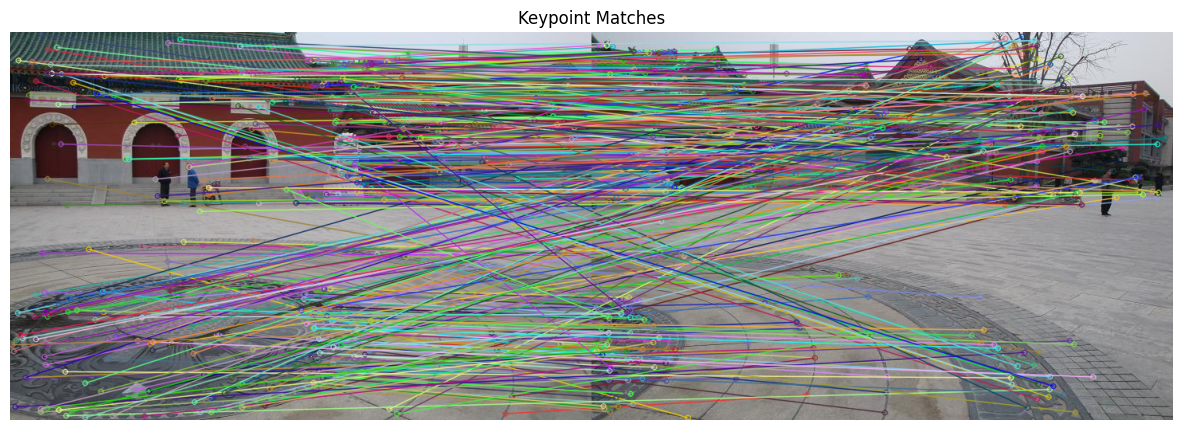

In [53]:
# Draw the matches
matched_image = cv2.drawMatches(left_image, keypoints_left, right_image, keypoints_right, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matched images using matplotlib
plt.figure(figsize=(15, 10))
plt.title('Keypoint Matches')
plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

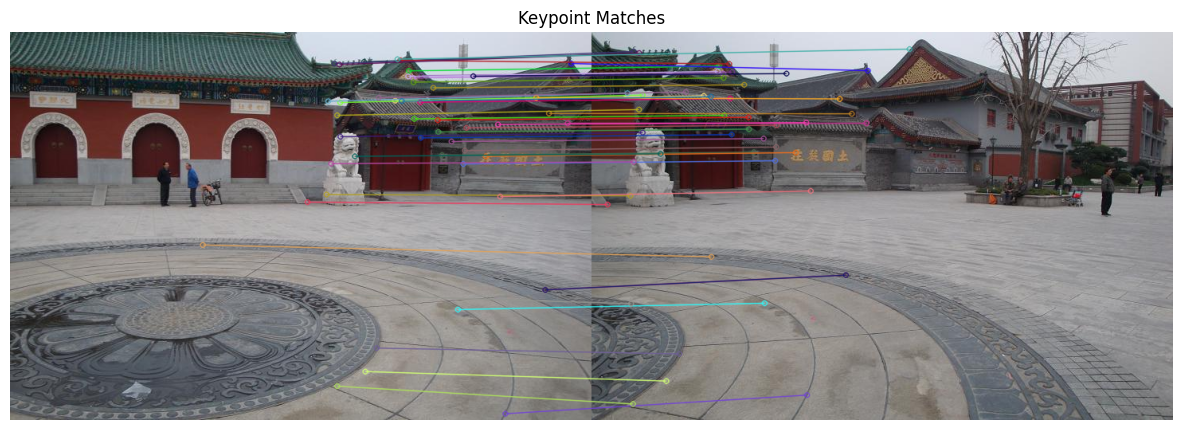

In [55]:
# Draw the matches
matched_image = cv2.drawMatches(left_image, keypoints_left, right_image, keypoints_right, matches[50:100], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matched images using matplotlib
plt.figure(figsize=(15, 10))
plt.title('Keypoint Matches')
plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

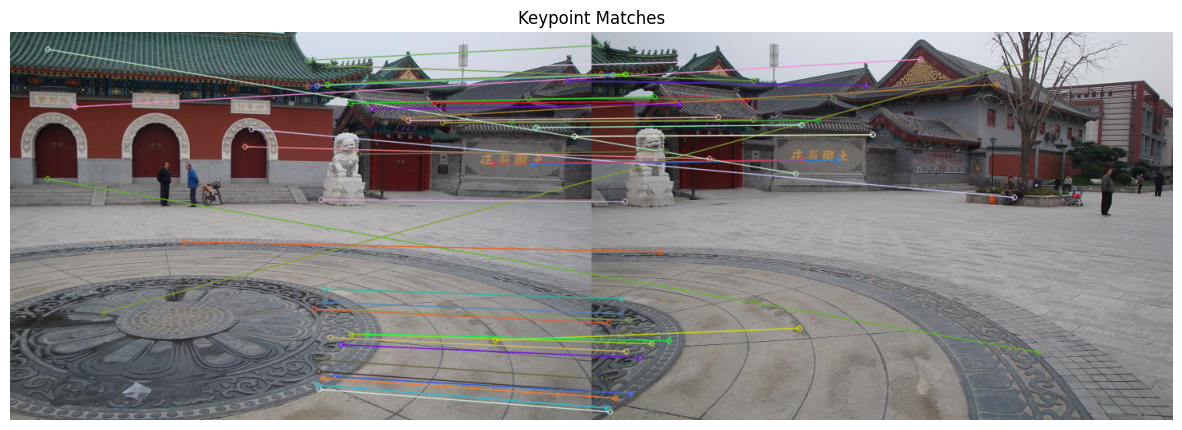

In [56]:
# Draw the matches
matched_image = cv2.drawMatches(left_image, keypoints_left, right_image, keypoints_right, matches[200:250], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matched images using matplotlib
plt.figure(figsize=(15, 10))
plt.title('Keypoint Matches')
plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [23]:
type(matches), type(matches[0]), type(matches[0].queryIdx), type(matches[0].trainIdx), type(matches[0].distance)

(list, cv2.DMatch, int, int, float)

In [24]:
print(dir(keypoints_left[0]))

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'angle', 'class_id', 'convert', 'octave', 'overlap', 'pt', 'response', 'size']


In [25]:
[attr for attr in dir(keypoints_left[0]) if not attr.startswith('__') and not attr.endswith('__')]

['angle', 'class_id', 'convert', 'octave', 'overlap', 'pt', 'response', 'size']

In [26]:
[attr for attr in dir(matches[0]) if not attr.startswith('__') and not attr.endswith('__')]

['distance', 'imgIdx', 'queryIdx', 'trainIdx']

In [27]:
match = matches[0]
print("Distance:", match.distance)
print("Query Index (queryIdx):", match.queryIdx)
print("Train Index (trainIdx):", match.trainIdx)
print("Image Index (imgIdx):", match.imgIdx)
match = matches[1]
print("Distance:", match.distance)
print("Query Index (queryIdx):", match.queryIdx)
print("Train Index (trainIdx):", match.trainIdx)
print("Image Index (imgIdx):", match.imgIdx)

Distance: 32.280025482177734
Query Index (queryIdx): 1824
Train Index (trainIdx): 455
Image Index (imgIdx): 0
Distance: 34.35112762451172
Query Index (queryIdx): 1935
Train Index (trainIdx): 548
Image Index (imgIdx): 0


The queryIdx refers to the index of the keypoint in the query image (left image in your case), and the trainIdx refers to the index of the keypoint in the train image (right image in your case).

### Finalizing Correspondence

In [33]:
correspondences = []
for match in matches:
    correspondences.append((keypoints_left[match.queryIdx].pt, keypoints_right[match.trainIdx].pt))

print(f'Total number of matches: {len(correspondences)}')

Total number of matches: 527


In [34]:
correspondences[:3]

[((538.3804931640625, 198.19094848632812),
  (202.21087646484375, 194.04898071289062)),
 ((612.888427734375, 93.23892974853516),
  (270.7051696777344, 92.30213928222656)),
 ((564.50537109375, 71.44009399414062), (224.0267333984375, 69.2257308959961))]

In [36]:
# Extract correspondences
points_left = np.float32([keypoints_left[m.queryIdx].pt for m in matches])
points_right = np.float32([keypoints_right[m.trainIdx].pt for m in matches])

In [37]:
points_left.shape, points_right.shape

((527, 2), (527, 2))

In [39]:
match_distances = [m.distance for m in matches]
print(f'Minimum distance: {min(match_distances)}')
print(f'Maximum distance: {max(match_distances)}')

Minimum distance: 32.280025482177734
Maximum distance: 392.32000732421875


In [52]:
match_distances = [m.distance for m in matches[:100]]
print(f'Minimum distance: {min(match_distances)}')
print(f'Maximum distance: {max(match_distances)}')

Minimum distance: 32.280025482177734
Maximum distance: 99.25220489501953


In [57]:
# Initialize the BFMatcher withouy cross-checking
bf_ = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)

# Match descriptors
matches_ = bf_.match(descriptors_left, descriptors_right)

# Print the number of matches
print(f"Number of matches: {len(matches)}")

Number of matches: 527


In [58]:
# in matches, filter any repeating values of queryIdx and trainIdx. keep first occurrence so that least distance one is kept
filtered_matches = []
filtered_matches.append(matches[0])
for match in matches[1:]:
    if match.queryIdx not in [m.queryIdx for m in filtered_matches] and match.trainIdx not in [m.trainIdx for m in filtered_matches]:
        filtered_matches.append(match)
print(f"Number of filtered matches: {len(filtered_matches)}")

Number of filtered matches: 527


In [59]:
nfeatures=100
correspondences = []
for match in filtered_matches[:nfeatures]:
    correspondences.append((keypoints_left[match.queryIdx].pt, keypoints_right[match.trainIdx].pt))
correspondences = np.array(correspondences)
len(correspondences), correspondences[:3]

(100,
 array([[[538.38049316, 198.19094849],
         [202.21087646, 194.04898071]],
 
        [[612.88842773,  93.23892975],
         [270.70516968,  92.30213928]],
 
        [[564.50537109,  71.44009399],
         [224.0267334 ,  69.2257309 ]]]))

## Estimate Homography

In [60]:
def compute_homography(correspondences):
    A = []
    for (x, y), (x_prime, y_prime) in correspondences:
        A.append([-x, -y, -1, 0, 0, 0, x_prime * x, x_prime * y, x_prime])
        A.append([0, 0, 0, -x, -y, -1, y_prime * x, y_prime * y, y_prime])

    A = np.array(A)
    _, _, Vt = np.linalg.svd(A)
    H = Vt[-1].reshape(3, 3)
    return H / H[-1, -1]

In [66]:
def ransac_homography(correspondences, iterations=1000, threshold=5.0):
    max_inliers = []
    best_H = None

    num_points = correspondences.shape[0]

    for _ in range(iterations):
        sample_indices = np.random.choice(num_points, 4, replace=False)
        sample_correspondences = correspondences[sample_indices]

        H = compute_homography(sample_correspondences)

        inliers = []
        for (x, y), (x_prime, y_prime) in correspondences:
            transformed_point = np.dot(H, np.array([x, y, 1]))
            transformed_point /= transformed_point[2]

            distance = np.linalg.norm(transformed_point[:2] - np.array([x_prime, y_prime]))

            if distance < threshold:
                inliers.append(((x, y), (x_prime, y_prime)))

        if len(inliers) > len(max_inliers):
            max_inliers = inliers
            best_H = H

    if best_H is not None:
        best_H = compute_homography(max_inliers)

    return best_H

In [67]:
homography_matrix = ransac_homography(correspondences)
homography_matrix

array([[ 1.80206400e+00, -1.14037608e-02, -6.53689705e+02],
       [ 1.57635055e-01,  1.58389823e+00, -9.09772408e+01],
       [ 1.07477457e-03,  3.06942198e-05,  1.00000000e+00]])

In [68]:
# norm of h_m
np.linalg.norm(homography_matrix)

659.9953557851535

In [69]:
type(homography_matrix)

numpy.ndarray

## Warping

### trial-1

In [70]:
def compute_bounding_box(image, H):
    h, w = image.shape[:2]
    
    corners = np.array([
        [0, 0, 1],       
        [w - 1, 0, 1],   
        [w - 1, h - 1, 1], 
        [0, h - 1, 1]  
    ])

    transformed_corners = []
    for corner in corners:
        transformed_corner = np.dot(H, corner)
        transformed_corner /= transformed_corner[2] 
        transformed_corners.append(transformed_corner[:2])
    
    transformed_corners = np.array(transformed_corners)
    x_min, y_min = np.min(transformed_corners, axis=0)
    x_max, y_max = np.max(transformed_corners, axis=0)

    return int(x_min), int(y_min), int(x_max), int(y_max)

In [71]:
def bilinear_interpolation(image, x, y):
    x1, y1 = int(x), int(y)
    x2, y2 = min(x1 + 1, image.shape[1] - 1), min(y1 + 1, image.shape[0] - 1)

    dx, dy = x - x1, y - y1

    top_left = image[y1, x1]
    top_right = image[y1, x2]
    bottom_left = image[y2, x1]
    bottom_right = image[y2, x2]

    top = (1 - dx) * top_left + dx * top_right
    bottom = (1 - dx) * bottom_left + dx * bottom_right

    interpolated_value = (1 - dy) * top + dy * bottom

    return np.clip(interpolated_value, 0, 255).astype(np.uint8)

In [75]:
def warp_image(image, H):
    x_min, y_min, x_max, y_max = compute_bounding_box(image, H)
    
    h_out, w_out = int(y_max - y_min), int(x_max - x_min)
    
    warped_image = np.zeros((h_out, w_out, 3), dtype=np.uint8)

    H_inv = np.linalg.inv(H)

    for y_out in range(h_out):
        for x_out in range(w_out):
            src_point = np.dot(H_inv, np.array([x_out + x_min, y_out + y_min, 1]))
            src_point /= src_point[2] 

            x_src, y_src = src_point[:2]

            if 0 <= x_src < image.shape[1] and 0 <= y_src < image.shape[0]:
                warped_image[y_out, x_out] = bilinear_interpolation(image, x_src, y_src)

    return warped_image

In [76]:
def stitch_images(base_image, warped_next_image):
    h_base, w_base = base_image.shape[:2]
    h_next, w_next = warped_next_image.shape[:2]

    stitched_canvas = np.zeros((max(h_base, h_next), max(w_base, w_next), 3), dtype=np.uint8)
    stitched_canvas[:h_base, :w_base] = base_image

    for y in range(h_next):
        for x in range(w_next):
            if np.any(warped_next_image[y, x] > 0):
                stitched_canvas[y, x] = warped_next_image[y, x]

    return stitched_canvas

In [84]:
warped_next_image = warp_image(right_image, homography_matrix)

In [85]:
stitched_image = stitch_images(left_image, warped_next_image)

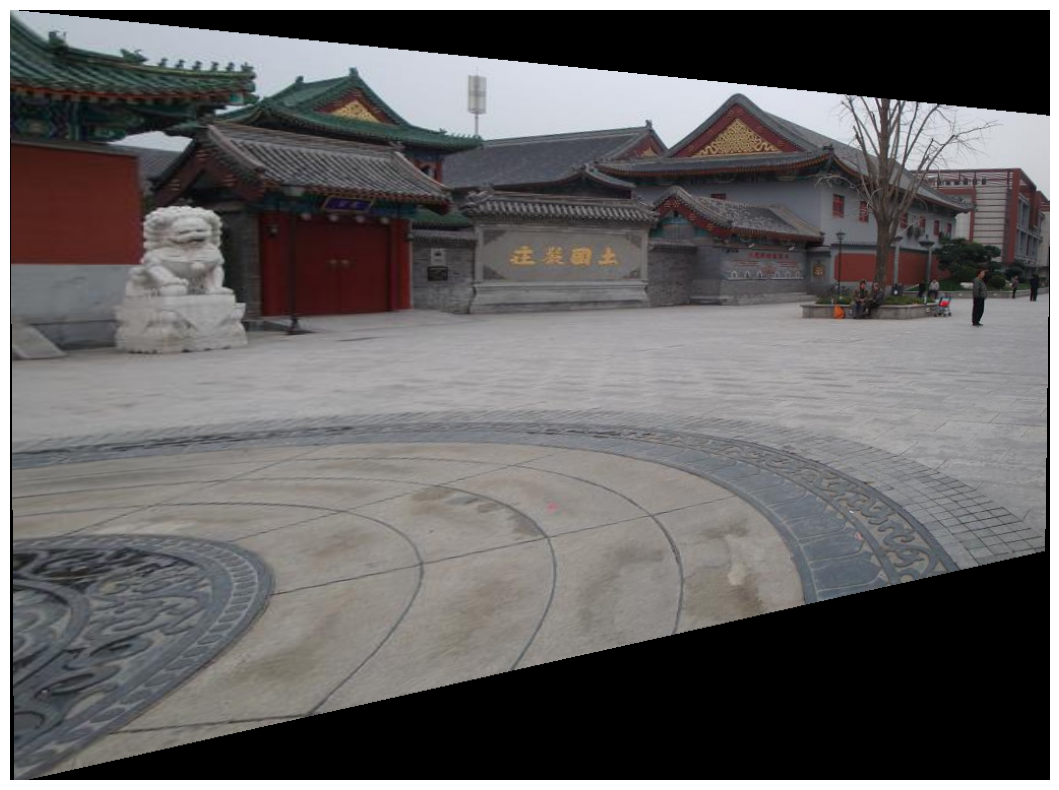

In [86]:
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(warped_next_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

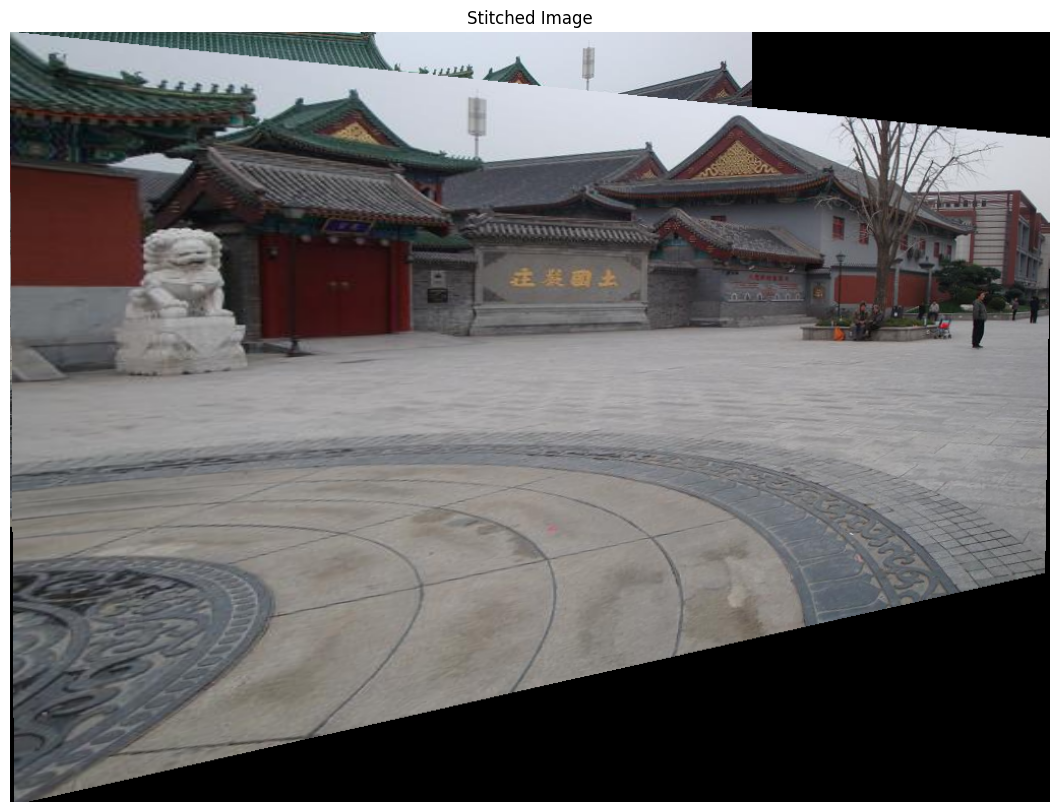

In [87]:
plt.figure(figsize=(15, 10))
plt.title('Stitched Image')
plt.imshow(cv2.cvtColor(stitched_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### trial-2

In [93]:
def warp_image(image, H, offset_x, offset_y):
        """
        Warp the image using the given homography and adjust for offsets.
        """
        x_min, y_min, x_max, y_max = compute_bounding_box(image, H)
        h_out, w_out = int(y_max - y_min), int(x_max - x_min)
        
        # Create a blank canvas for the warped image
        warped_image = np.zeros((h_out, w_out, 3), dtype=np.uint8)
        H_inv = np.linalg.inv(H)

        # Map each pixel from the destination canvas to the source image using H_inv
        for y_out in range(h_out):
            for x_out in range(w_out):
                src_point = np.dot(H_inv, np.array([x_out + x_min, y_out + y_min, 1]))
                src_point /= src_point[2]
                x_src, y_src = src_point[:2]

                if 0 <= x_src < image.shape[1] and 0 <= y_src < image.shape[0]:
                    warped_image[y_out, x_out] = bilinear_interpolation(image, x_src, y_src)

        # Adjust the offset
        return warped_image, offset_x - x_min, offset_y - y_min

def stitch_images(canvas, warped_image, offset_x, offset_y):
    """
    Stitch the warped image onto the larger canvas at the given offset.
    """
    h_canvas, w_canvas = canvas.shape[:2]
    h_warped, w_warped = warped_image.shape[:2]

    for y in range(h_warped):
        for x in range(w_warped):
            if np.any(warped_image[y, x] > 0):
                if 0 <= y + offset_y < h_canvas and 0 <= x + offset_x < w_canvas:
                    canvas[y + offset_y, x + offset_x] = warped_image[y, x]

    return canvas

def crop_canvas(canvas, margin=10):
    """
    Crop the canvas to remove any empty (black) borders and expand the crop region by a specified margin.
    """
    # Convert the canvas to grayscale
    gray_canvas = cv2.cvtColor(canvas, cv2.COLOR_BGR2GRAY)
    
    # Threshold the grayscale image to create a binary image
    _, thresh = cv2.threshold(gray_canvas, 1, 255, cv2.THRESH_BINARY)
    
    # Find contours in the binary image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if contours:
        # Get the bounding rectangle of the largest contour
        x, y, w, h = cv2.boundingRect(contours[0])
        
        # Expand the bounding box by the specified margin
        x_start = max(x - margin, 0)
        y_start = max(y - margin, 0)
        x_end = min(x + w + margin, canvas.shape[1])
        y_end = min(y + h + margin, canvas.shape[0])
        
        # Crop the canvas using the expanded bounding box
        return canvas[y_start:y_end, x_start:x_end]
    
    return canvas

In [89]:
def detect_and_match_features(image1, image2, nfeatures=100):
        sift = cv2.SIFT_create()  # Initialize SIFT detector
        keypoints_left, descriptors_left = sift.detectAndCompute(image1, None)
        keypoints_right, descriptors_right = sift.detectAndCompute(image2, None)

        # Initialize the BFMatcher
        bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
        # Match descriptors
        matches = bf.match(descriptors_left, descriptors_right)
        # Sort matches based on distance
        matches = sorted(matches, key=lambda x: x.distance)

        # Ensure that the matches are unique
        filtered_matches = []
        filtered_matches.append(matches[0])
        for match in matches[1:nfeatures]:
            if match.queryIdx not in [m.queryIdx for m in filtered_matches] and match.trainIdx not in [m.trainIdx for m in filtered_matches]:
                filtered_matches.append(match)

        # Get the keypoints corresponding to the matches
        correspondences = []
        for match in filtered_matches:
            correspondences.append((keypoints_left[match.queryIdx].pt, keypoints_right[match.trainIdx].pt))

        return np.array(correspondences)

In [97]:
all_images = [left_image, right_image]

base_image = all_images[0]
homography_matrix_list = []
accumulated_homography = np.eye(3)

# Estimate canvas size based on a larger canvas
h_base, w_base = base_image.shape[:2]
canvas = np.zeros((h_base * 6, w_base * 6, 3), dtype=np.uint8)

# Place the first image in the middle of the canvas
offset_x, offset_y = w_base, h_base
canvas[offset_y:offset_y + h_base, offset_x:offset_x + w_base] = base_image

# Iterate over remaining images
for i in range(1, len(all_images)):
    next_image = all_images[i]
    good_matches = detect_and_match_features(base_image, next_image)

    # Compute homography and accumulate it
    H = ransac_homography(good_matches)
    homography_matrix_list.append(H)
    accumulated_homography = np.dot(accumulated_homography, H)

    # Warp the image using the accumulated homography and track offsets
    warped_next_image, x_shift, y_shift = warp_image(next_image, accumulated_homography, offset_x, offset_y)

    # Update offsets for the next iteration
    offset_x += x_shift
    offset_y += y_shift

    # Stitch the warped image into the larger canvas
    canvas = stitch_images(canvas, warped_next_image, offset_x, offset_y)

# Crop the final stitched image to remove empty borders
stitched_image = crop_canvas(canvas)

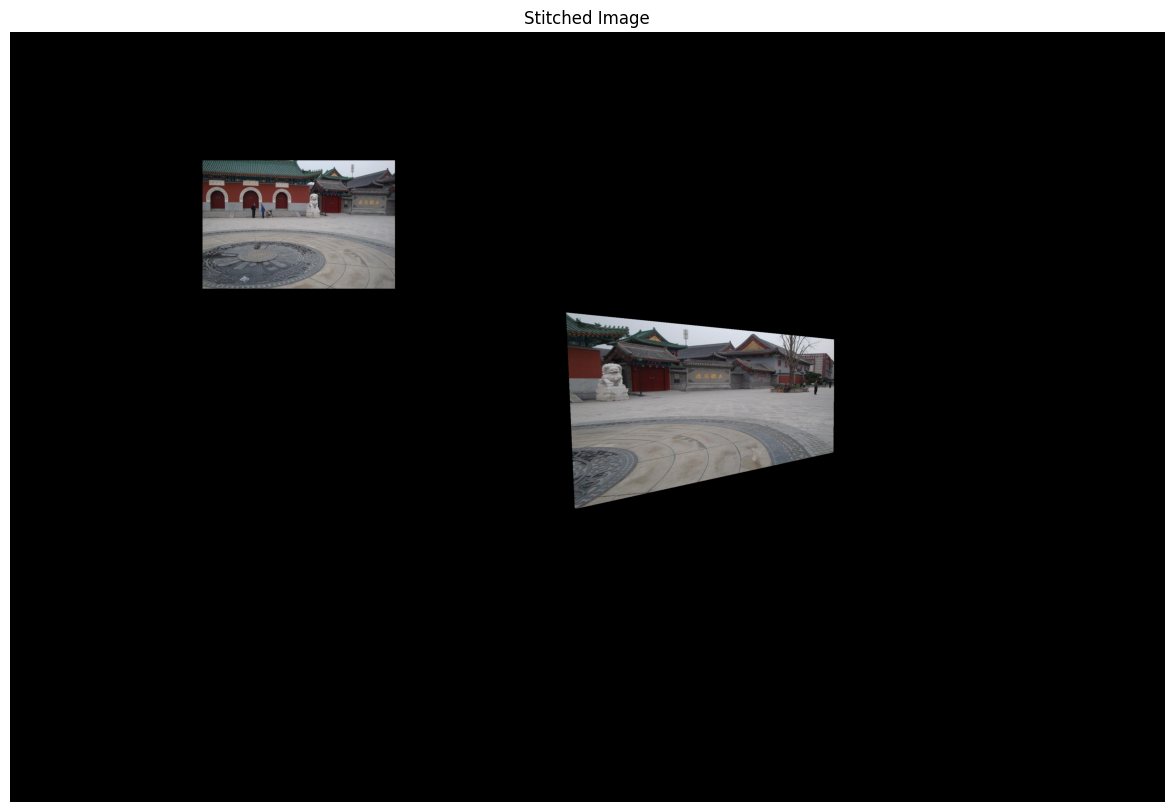

In [98]:
plt.figure(figsize=(15, 10))
plt.title('Stitched Image')
plt.imshow(cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### trial-3

In [102]:
def compute_bounding_box(homography, img_width, img_height):
    """Calculate the bounding box of a transformed image using the homography matrix."""
    corners = np.array([[0, img_width - 1, 0, img_width - 1], 
                        [0, 0, img_height - 1, img_height - 1], 
                        [1, 1, 1, 1]])
    
    transformed_corners = np.dot(homography, corners)
    transformed_corners /= transformed_corners[2, :]
    
    x_min, x_max = np.min(transformed_corners[0]), np.max(transformed_corners[0])
    y_min, y_max = np.min(transformed_corners[1]), np.max(transformed_corners[1])
    
    return int(x_min), int(x_max), int(y_min), int(y_max)


def warp_and_place_image(source_img, homography, dest_canvas, offset=(0, 0)):
    """Warp source image with the given homography and place it on the destination canvas."""
    h, w, _ = source_img.shape
    inv_homography = np.linalg.inv(homography)

    # Compute the bounding box of the transformed image
    x_min, x_max, y_min, y_max = compute_bounding_box(homography, w, h)
    coords = np.indices((y_max - y_min, x_max - x_min)).reshape(2, -1)
    coords += np.array([[x_min], [y_min]])
    
    homogeneous_coords = np.vstack((coords, np.ones(coords.shape[1])))
    transformed_coords = np.dot(inv_homography, homogeneous_coords)
    transformed_coords /= transformed_coords[2, :]
    
    x_src, y_src = transformed_coords[:2, :].astype(np.int32)
    
    # Ensure that coordinates are within the valid range of source image dimensions
    valid_indices = np.where((x_src >= 0) & (x_src < w) & (y_src >= 0) & (y_src < h))
    dest_y, dest_x = coords[1, valid_indices] + offset[1], coords[0, valid_indices] + offset[0]

    # Place the valid warped source image pixels onto the destination canvas
    dest_canvas[dest_y, dest_x] = source_img[y_src[valid_indices], x_src[valid_indices]]


def stitch_images(all_images, canvas_size=(3000, 6000), resize_shape=None):
    """Stitch multiple images into a single panorama."""
    
    # Create a large blank canvas for stitching
    canvas = np.zeros((*canvas_size, 3), dtype=np.uint8)

    # Initialize variables
    prev_homography = np.eye(3)
    offset = [canvas_size[1] // 2, canvas_size[0] // 2]

    # Loop through image pairs and stitch them
    for i in range(1, len(all_images)):
        # Read source and destination images
        src_img = all_images[i - 1]
        dest_img = all_images[i]

        if resize_shape:
            src_img = cv2.resize(src_img, resize_shape)
            dest_img = cv2.resize(dest_img, resize_shape)

        # Detect features and compute matches
        matches = detect_and_match_features(src_img, dest_img)
        best_homography = ransac_homography(matches)

        # Update the cumulative homography
        prev_homography = np.dot(prev_homography, best_homography)

        # Warp the destination image onto the canvas
        warp_and_place_image(dest_img, prev_homography, dest_canvas=canvas, offset=offset)

    return canvas


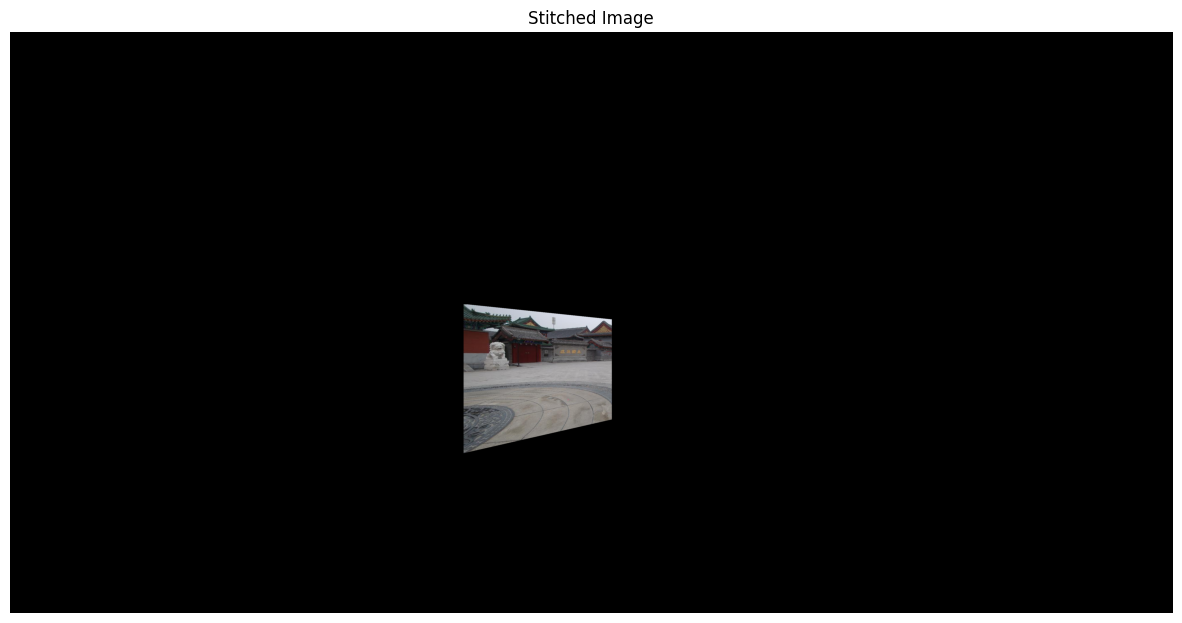

In [103]:
canvas = stitch_images(all_images)
plt.figure(figsize=(15, 10))
plt.title('Stitched Image')
plt.imshow(cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()